<a href="https://colab.research.google.com/github/valmirf/processamento_imagens/blob/master/Opera%C3%A7%C3%B5es/aula_02_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/valmirf/processamento_imagens.git

Cloning into 'processamento_imagens'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 139 (delta 25), reused 0 (delta 0), pack-reused 71
Receiving objects: 100% (139/139), 26.91 MiB | 29.23 MiB/s, done.
Resolving deltas: 100% (41/41), done.


# Opencv - Aula 2

Imports necessários

In [0]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Operações com Imagens

### 1.1 Adição de Imagens

Dadas duas imagens com as mesmas dimensões:

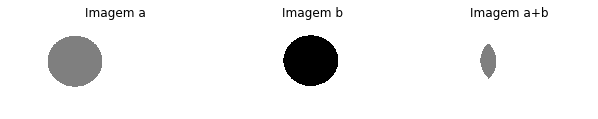

In [0]:
img1 = cv2.imread('processamento_imagens/imagens/soma_imagem1.png')
img2 = cv2.imread('processamento_imagens/imagens/soma_imagem2.png')
dst = cv2.add(img1,img2)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(img1)
ax[0].set_title('Imagem a')
ax[0].set_axis_off()

ax[1].imshow(img2)
ax[1].set_title('Imagem b')
ax[1].set_axis_off()

ax[2].imshow(dst)
ax[2].set_title('Imagem a+b')
ax[2].set_axis_off()

### 1.2 cv2.addWeighted()

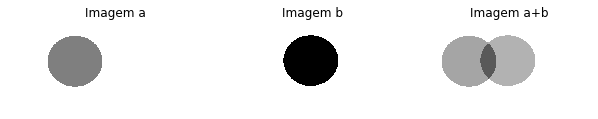

In [0]:
dst2 = cv2.addWeighted(img1,0.7,img2,0.3,0) 
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(img1)
ax[0].set_title('Imagem a')
ax[0].set_axis_off()
ax[1].imshow(img2)
ax[1].set_title('Imagem b')
ax[1].set_axis_off()
ax[2].imshow(dst2)
ax[2].set_title('Imagem a+b')
ax[2].set_axis_off()

### 1.3 Subtração

(203, 288, 3)
(203, 288, 3)


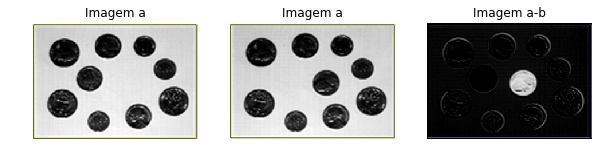

In [0]:
img1 = cv2.imread('processamento_imagens/imagens/moedaA.jpg')
print(img1.shape)
img2 = cv2.imread('processamento_imagens/imagens/moedaB.jpg')
print(img2.shape)
dst = cv2.subtract(img1,img2)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(img1)
ax[0].set_title('Imagem a')
ax[0].set_axis_off()

ax[1].imshow(img2)
ax[1].set_title('Imagem a')
ax[1].set_axis_off()

ax[2].imshow(dst)
ax[2].set_title('Imagem a-b')
ax[2].set_axis_off()

### 1.4 Operações Lógicas


AND

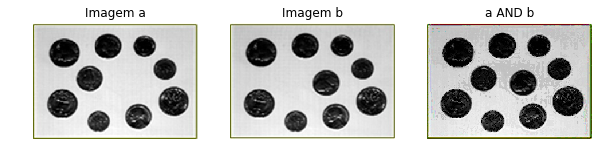

In [0]:
mask_inv = cv2.bitwise_and(img1,img2)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(img1)
ax[0].set_title('Imagem a')
ax[0].set_axis_off()
ax[1].imshow(img2)
ax[1].set_title('Imagem b')
ax[1].set_axis_off()
ax[2].imshow(mask_inv)
ax[2].set_title('a AND b')
ax[2].set_axis_off()

#### NOT

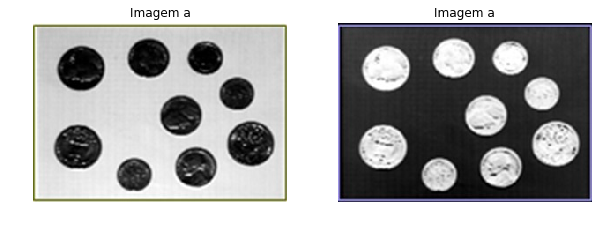

In [0]:
mask_inv = cv2.bitwise_not(img2)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(img2)
ax[0].set_title('Imagem a')
ax[0].set_axis_off()
ax[1].imshow(mask_inv)
ax[1].set_title('Imagem a')
ax[1].set_axis_off()


## 2. Transformações Geométricas

### 2.1 Translação

*warpAffine(imagem,matriz deslocamento, dimensões da imagem). 


*Matrix de deslocamento: as duas primeira colunas não devem ser alteradas e a última coluna é para especificar o deslocamento. A primeira linha é o deslocamento no eixo “x” e a segunda linha é o deslocamento no eixo “y”.

(329, 340, 3)


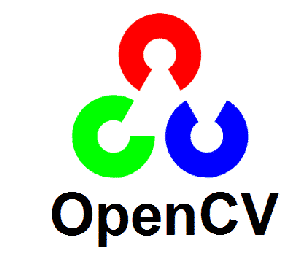

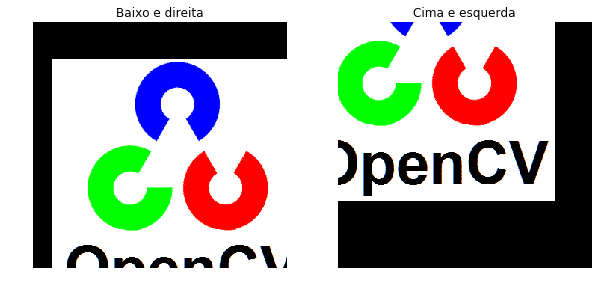

In [0]:
imagem = cv2.imread('processamento_imagens/imagens/logo_opencv.png')
print(imagem.shape)
altura, largura = imagem.shape[:2] #altura e largura da imagem 


plt.figure(figsize=(4, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

#deslocamento de 25 pixels para direita e 50 pixels para baixo
deslocamento1 = np.float32([[1, 0, 25], [0, 1, 50]])
deslocado1 = cv2.warpAffine(imagem, deslocamento1, (largura, altura))

#deslocamento de 50 pixels para esquerda e 00 pixels para cima
deslocamento2 = np.float32([[1, 0, -50], [0, 1, -90]])
deslocado2 = cv2.warpAffine(imagem, deslocamento2, (largura, altura))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(deslocado1)
ax[0].set_title('Baixo e direita')
ax[0].set_axis_off()
ax[1].imshow(deslocado2)
ax[1].set_title('Cima e esquerda')
ax[1].set_axis_off()


### 2.2 Rotação

*warpAffine(imagem, rotacao, (largura, altura))

*Rotação: É preciso fornecer um ponto de fixação para rotacionar a partir desse ponto, um ângulo e um valor que pode alterar o tamanho da imagem se for diferente de 1.



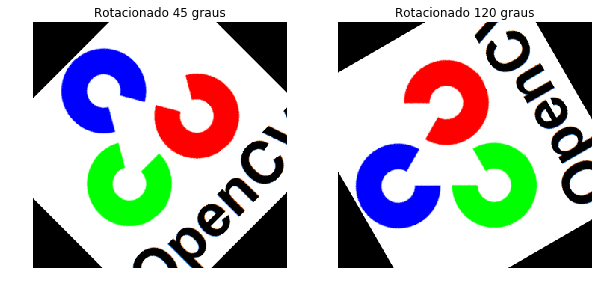

In [0]:
ponto = (largura/2, altura/2) #ponto no centro da figura (ponto mais utilizao)

#rotação de 45 graus
rotacao1 = cv2.getRotationMatrix2D(ponto, 45, 1.0)
rotacionado1 = cv2.warpAffine(imagem, rotacao1, (largura, altura))
 
#rotação de 120 graus  
rotacao2 = cv2.getRotationMatrix2D(ponto, 120, 1.0)
rotacionado2 = cv2.warpAffine(imagem, rotacao2, (largura, altura))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(rotacionado1)
ax[0].set_title('Rotacionado 45 graus')
ax[0].set_axis_off()
ax[1].imshow(rotacionado2)
ax[1].set_title('Rotacionado 120 graus')
ax[1].set_axis_off()


## 3. Interpolação

Interpolações do vizinho mais próximo, bilinear e bicúbica

(22, 20, 3)


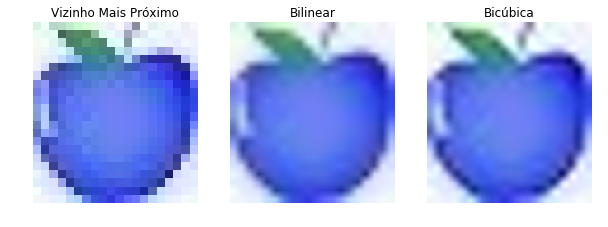

In [0]:
apple = cv2.imread('processamento_imagens/imagens/apple.jpg')
print(apple.shape)

#interpolação do vizinho mais próximo
near_img = cv2.resize(apple,None, fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)

#interpolação bilinear
bilinear_img = cv2.resize(apple,None, fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR)

#interpolação bicúbica
bicubic_img = cv2.resize(apple,None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)



fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(near_img)
ax[0].set_title('Vizinho Mais Próximo')
ax[0].set_axis_off()
ax[1].imshow(bilinear_img)
ax[1].set_title('Bilinear')
ax[1].set_axis_off()
ax[2].imshow(bicubic_img)
ax[2].set_title('Bicúbica')
ax[2].set_axis_off()

## 4. Histograma da imagem

(950, 950, 3)


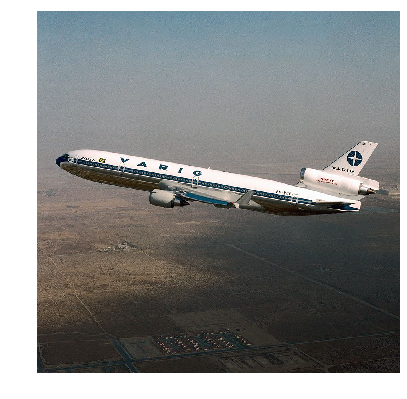

In [0]:
img = cv2.imread('processamento_imagens/imagens/varigmd11.jpg') #Lendo uma imagem
print(img.shape)

plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Conversão necessária para protar a imagem, devido ao opencv usa o 
                                                 #formato RGB, enquanto o matplotlib usa RGB

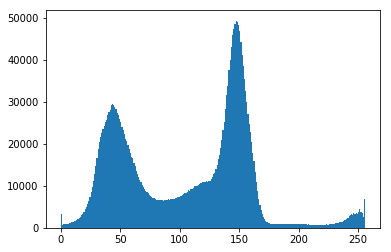

In [0]:
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

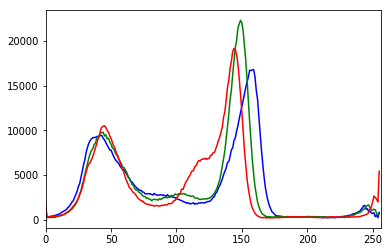

In [0]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### 4.1 Equalização do Histograma

(950, 950, 3)


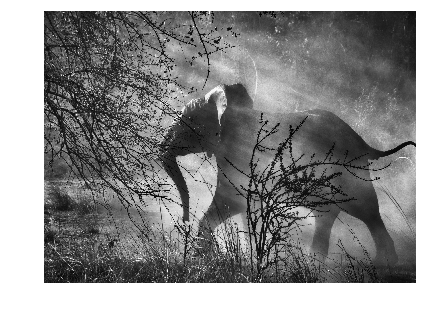

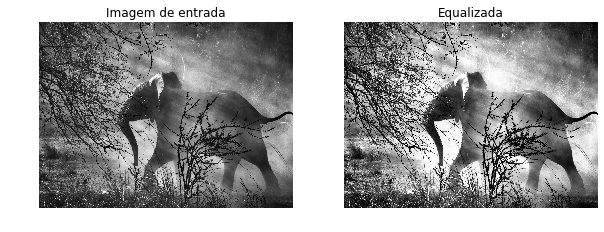

In [0]:
img2 = cv2.imread('processamento_imagens/imagens/elefante.jpeg') #Lendo uma imagem
print(img.shape)

plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) #Conversão necessária para protar a imagem, devido ao opencv usa o 
                                                 #formato RGB, enquanto o matplotlib usa RGB

imggray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

equ = cv2.equalizeHist(imggray)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(imggray, cmap='gray')
ax[0].set_title('Imagem de entrada')
ax[0].set_axis_off()

ax[1].imshow(equ, cmap='gray')
ax[1].set_title('Equalizada')
ax[1].set_axis_off()

### 4.2 Negativo

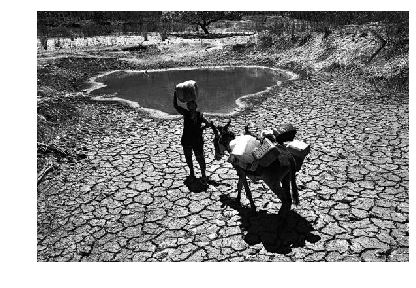

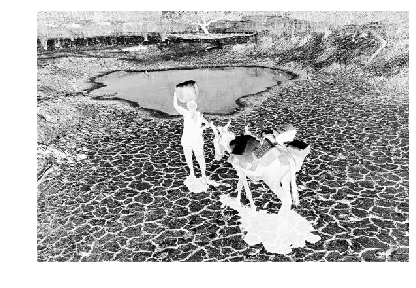

In [0]:
img = cv2.imread('processamento_imagens/imagens/sertao-araquem-alcantara.jpg') #Lendo uma imagem

imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgneg = 255-imggray


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(imgneg, cmap='gray')



### 4.3 Brilho

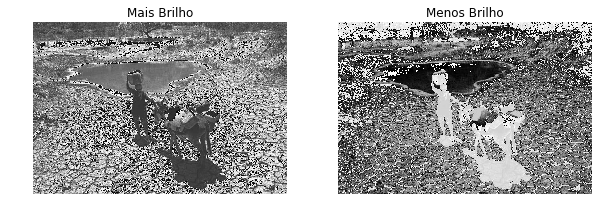

In [0]:
imgbrilhopos = imggray+50
imgbrilhoneg = imggray-50


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(imgbrilhopos, cmap='gray')
ax[0].set_title('Mais Brilho')
ax[0].set_axis_off()

ax[1].imshow(imgbrilhoneg, cmap='gray')
ax[1].set_title('Menos Brilho')
ax[1].set_axis_off()



In [0]:
### 4.4 Contraste

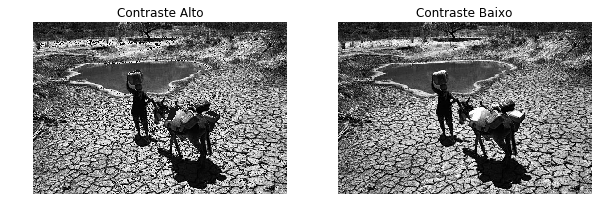

In [0]:
imgcontrastealto = imggray*1.1
imgcontrastebaixo = imggray*0.9

imgcontrastealto = imgcontrastealto.astype('uint8')
imgcontrastebaixo = imgcontrastebaixo.astype('uint8')
                   
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(imgcontrastealto, cmap='gray')
ax[0].set_title('Contraste Alto')
ax[0].set_axis_off()

ax[1].imshow(imgcontrastebaixo, cmap='gray')
ax[1].set_title('Contraste Baixo')
ax[1].set_axis_off()


## 5. Limiarização

(300, 400)


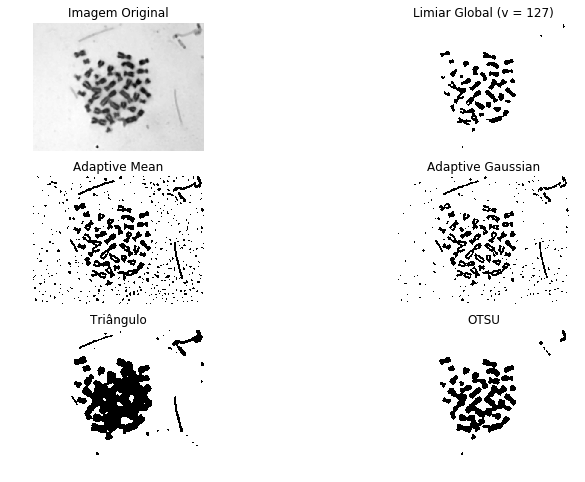

In [5]:
imgorig = cv2.imread('processamento_imagens/imagens/cromossomos.png')
img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
print(img.shape)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
th4 = cv2.threshold(img,125,255,cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE) #TRIANGLE
th5 = cv2.threshold(img,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #OTSU

titles = ['Imagem Original', 'Limiar Global (v = 127)',
            'Adaptive Mean', 'Adaptive Gaussian', 'Triângulo', 'OTSU']
images = [img, th1, th2, th3, th4[1], th5[1]]

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
ax = axes.ravel()
for i in range(6):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(titles[i])
    ax[i].set_axis_off()


## 6.0 Sistema de cores


### 6.1 Canais separados

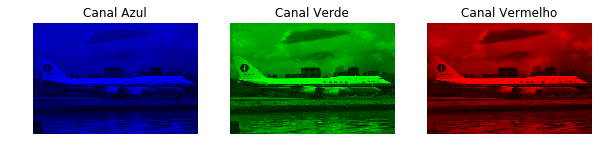

In [0]:
img3 = cv2.imread('processamento_imagens/imagens/varig747.jpg') #Lendo uma imagem


b = img3.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = img3.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = img3.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

# RGB - Green
ax[0].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
ax[0].set_title('Canal Azul')
ax[0].set_axis_off()


# RGB - Blue
ax[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
ax[1].set_title('Canal Verde')
ax[1].set_axis_off()


# RGB - Red
ax[2].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
ax[2].set_title('Canal Vermelho')
ax[2].set_axis_off()


### 6.2 Conversão RGB para HSV

OBS: para outro sistema de cor, usar o comando: cv2.cvtColor(imagem, cv2.COLOR_BGR2NOVOSISTEMADECOR)

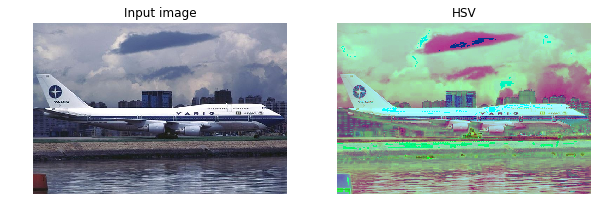

In [0]:
img3 = cv2.imread('processamento_imagens/imagens/varig747.jpg') #Lendo uma imagem


hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV))
ax[1].set_title('HSV')
ax[1].set_axis_off()